## Final Project: Linear Regression

- We want to present the relationship between (two) variables linearly

- For example, recall the running distance and drinking water 

- We are interested to obtain the best line describing by `y_pred[i] = w_1 x[i] +w_0` that maps running distance to drinking water

- Below, list `x` represents running distance in miles and list `y` represents the drinking water in litres 

Text(0, 0.5, 'Water Drinks (Litre)')

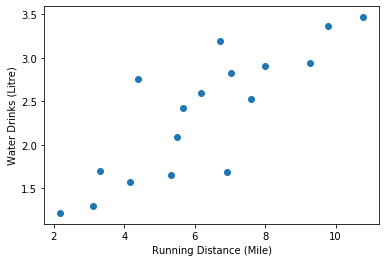

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')



## In order to obtain the best line, we should define error first

- For linear relationship, mean-square-error (MSE) represents is it a good line (good model) or not 

- $y[i]$ and $y_{pred}[i]$ are i-th element of list `y` and list `y_pred` respectively where `y_pred[i] = w_1 x[i] +w_0`

- Define error as: $E[i] = y_{pred}[i] - y[i]$

- Define mean-square-error as: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} E[i]^2$

- Also mean-square-error is equal to: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

- The parameter $N$ is: $N = len(y)$

### Question 1: Obtain the MSE for the following two lines:

1- `y_pred[i] = 0.7*x[i] + 0.3`

2- `y_pred[i] = 0.25163494*x[i] + 0.79880123`

Hint: Your function take four input arguments: 1- y, 2- x, 3- slope, 4-intercept

In [277]:
def min_sq_error(y, x, w1, w0):
    
    y_pred = [w1*x[i] + w0 for i in range(len(x))]
    # Recall Error as E[i] = y_pred[i] - y[i]
    Error = [y_pred[i] - y[i] for i in range(len(y))]
    squared_error = np.power(Error, 2)
    sum_squared_error = np.sum(squared_error) #sum([(y_pred[i]-y[i])**2 for i in range(len(y))])
    N = len(y)
    mse = sum_squared_error/N
#     print("Mean of Error is: " + str(np.mean(Error)))
#     print("Variance of Error is: " + str(np.var(Error)))
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))


6.518593101764704
0.15385767404191164


## Question 2: Obtain the best line (Coding is not required)

- In order the best line, we want to obtain which slope ($w_1$) and intercept ($w_0$) minimize the mean-square-error (MSE)

- Mathematically:

    - $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

    - $MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$ 

The steps in order to obtain the best line: 

1- Compute: 

$\frac{\partial MSE}{\partial w_1}$ 

and

$\frac{\partial MSE}{\partial w_0}$

2- then obtain $w_1$ and $w_0$ such that:


$\frac{\partial MSE}{\partial w_1} = 0$ 

and

$\frac{\partial MSE}{\partial w_0} = 0$

- For this part, you need to use partial derivative and you use derivative table

- For this part, write down the steps and the solution on a paper 

<img style="transform: rotate(90deg)" src="final_project_1.jpg">

<img style="transform: rotate(90deg)" src="final_project_2.jpg">

<img style="transform: rotate(90deg)" src="final_project_3.jpg">

## Question 3: Write a code to return the slope and intercept with given list x and y

- After taking partial derivative of mean-squared-error and setting to zero for both $w_1$ and $w_0$ ($\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$)

- $w_1$ = is obtained from list x and list y
- $w_0 $ = is obtained from $w_1$, list x and list y
- Write a Python function that return $w_1$ and $w_0$ from your calculation on the paper 

In [228]:
def slope_intercept_LR(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    xy_bar = np.mean(x*y)     # sum([(i*j) for i,j in zip(x,y)]) / len(x)
    x_squared_bar = np.mean(np.square(x))     # sum([i**2 for i in x]) / len(x)
    x_bar_squared = x_bar ** 2 
    w1 = ((xy_bar - x_bar * y_bar)/(x_squared_bar - x_bar_squared))
    w0 = (y_bar - w1*x_bar) 
    return w1, w0 # w1 = slope w0 = intercept

print(slope_intercept_LR(x, y))

(0.25163494428355315, 0.7988012261753947)


## Question 4: After obtain the best line, obtain the variance and mean of error

- In Question 3, we have obtained the best line
- So, we can error list which its element is: $E[i] = y_{pred}[i] - y[i]$
- Write a function that calculate variance and mean of list $E$
- Plot the distribution of the error for optimal line

('Mean: 2.2940647058823522', 'Variance: 1.2558602269896193')
('Mean: -0.018985294117646986', 'Variance: 0.1538723269896193')


ValueError: color kwarg must have one color per data set. 17 data sets and 1 colors were provided

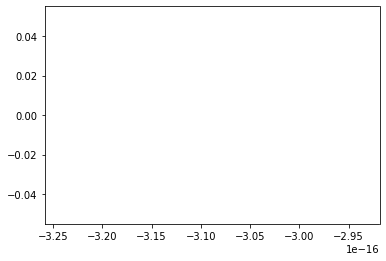

In [274]:
import seaborn as sns

def e_calculations(x, y, w1, w0):
    
    y_pred = [w1*x[i] + w0 for i in range(len(x))]
    Error = [y_pred[i] - y[i] for i in range(len(y))]
    mean_E = np.mean(Error)
    var_E = np.var(Error)
    return "Mean: " + str(mean_E), "Variance: " + str(var_E)
    
print(e_calculations(x, y, 0.7, 0.3))
print(e_calculations(x, y, 0.25, 0.79))


def e_list():
    Error = [y_pred[i] - y[i] for i in range(len(y))]
    return Error

sns.distplot(Error, hist=True, kde=False, bins=4)

## Question 5: (Optional but Bonus point) In almost all applications, we update the slope and intercept through iteration

- Instead of putting the $\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$
    - Initialize the $w_1$ and $w_0$ with arbitrary value, then update them by follwing Gradient Updating Rule:
    - $w_1 = w_1 - step*\frac{\partial MSE}{\partial w_1}$
    - $w_0 = w_0 - step*\frac{\partial MSE}{\partial w_0}$

In [276]:
import numpy as np

w_0 = np.random.randn()
w_1 = np.random.randn()

x_bar = np.mean(x)
y_bar = np.mean(y)
xy_bar = np.mean(x*y)
x_squared_bar = np.mean(np.square(x))

step = 0.01
epoch = 5000
for _ in range(epoch):
    w_1 = w_1 - step * ((w_1*x_squared_bar) + (w_0*x_bar) - (xy_bar))
    w_0 = w_0 - step * ((w_1*x_bar) + (w_0) - (y_bar))
    
print(w_1)
print(w_0)


0.2520364740904053
0.7959546285645156
